# **머신러닝**
---
## 머신러닝의 전체 흐름

```
1️⃣ 데이터 수집 → 2️⃣ 데이터 전처리
   → 3️⃣ 학습용/테스트용 분리
   → 4️⃣ 모델 학습(train)
   → 5️⃣ 예측(predict)
   → 6️⃣ 평가(evaluate)
```  

| 구분        | 설명                          | 대표 예시             |
| --------- | --------------------------- | ----------------- |
| **지도학습**  | 입력(X)과 정답(y)이 모두 있는 데이터로 학습 | 시험 점수 예측, 스팸메일 분류 |
| **비지도학습** | 정답이 없는 데이터에서 패턴을 스스로 찾음     | 고객 군집화, 뉴스 토픽 분류  |
| **강화학습**  | 보상을 최대화하는 방향으로 행동 학습        | 게임 AI, 로봇 제어      |

In [1]:
from sklearn.model_selection import train_test_split

# 예시 데이터
X = [1, 2, 3, 4, 5, 6, 7, 8]
y = [10, 20, 30, 40, 50, 60, 70, 80]

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("훈련용 X:", X_train)
print("테스트용 X:", X_test)
print("훈련용 y:", y_train)
print("테스트용 y:", y_test)

훈련용 X: [1, 8, 3, 5, 4, 7]
테스트용 X: [2, 6]
훈련용 y: [10, 80, 30, 50, 40, 70]
테스트용 y: [20, 60]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 간단한 데이터셋 생성
data = {
    "공부시간": [1, 2, 3, 4, 5, 6, 7, 8],
    "점수": [20, 40, 50, 60, 70, 75, 85, 95]
}
df = pd.DataFrame(data)

# 입력(X)과 정답(y) 나누기
X = df[["공부시간"]]   # 2차원 형태로 유지
y = df["점수"] # 1차원 시리즈

# train/test 분리
# X_train부터 y_test 의 순서가 고정되어 있음 -> 순서를 지킬것
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

print("훈련용 데이터:\n", X_train)
print("\n테스트용 데이터:\n", X_test)


훈련용 데이터:
    공부시간
1     2
6     7
0     1
4     5
3     4
5     6

테스트용 데이터:
    공부시간
7     8
2     3


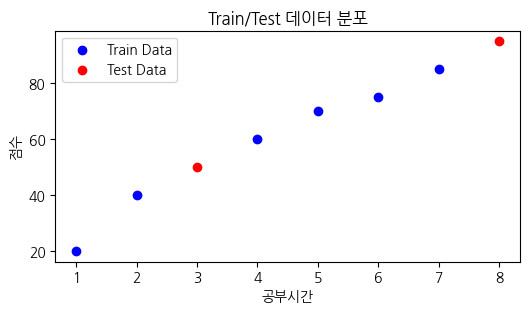

In [11]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import wordcloud


plt.figure(figsize=(6,3))
plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.scatter(X_test, y_test, color="red", label="Test Data")
plt.title("Train/Test 데이터 분포")
plt.xlabel("공부시간")
plt.ylabel("점수")
plt.legend()
plt.show()

## 포트폴리오_ 문제해결을 위한 것이 필요 // 목적이 중요

---

## 로지스틱 회귀

1. 로지스틱 회귀란?  

> “이진 분류(Binary Classification) 를 위한 확률 기반 모델”
- 이름은 _회귀(Regression)_ 이지만, 실제로는 **분류(Classification)** 모델입니다.
- 예측값을 **0~1 사이 확률**로 변환하여
    기준(0.5 이상)을 넘으면 ‘긍정’, 아니면 ‘부정’으로 판단합니다.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# ① 샘플 데이터 구성
data = {
    "text": [
        "이 영화 정말 재미있어요",
        "배우 연기가 최악이에요",
        "음악이 감동적이었어요",
        "스토리가 너무 지루했어요",
        "완전 최고의 영화예요",
        "시간 낭비였어요",
        "음악이 정말 좋았어요",
        "연출이 엉망이에요",
        "정말 멋진 작품이에요",
        "이건 보기 힘들었어요"
    ],
    "label": [1,0,1,0,1,0,1,0,1,0]
}
df = pd.DataFrame(data)

In [19]:
# 데이터 분리 
# 문장의 뉘양스가 실제 감정과 매칭이 되는지 여부가 중요
# 정답의 유효성(신뢰성)이 중요함

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.3, random_state=42)

print("훈련용 X:", X_train)
print("테스트용 X:", X_test)
print("훈련용 y:", y_train)
print("테스트용 y:", y_test)

훈련용 X: 0    이 영화 정말 재미있어요
7        연출이 엉망이에요
2      음악이 감동적이었어요
9      이건 보기 힘들었어요
4      완전 최고의 영화예요
3    스토리가 너무 지루했어요
6      음악이 정말 좋았어요
Name: text, dtype: object
테스트용 X: 8     정말 멋진 작품이에요
1    배우 연기가 최악이에요
5        시간 낭비였어요
Name: text, dtype: object
훈련용 y: 0    1
7    0
2    1
9    0
4    1
3    0
6    1
Name: label, dtype: int64
테스트용 y: 8    1
1    0
5    0
Name: label, dtype: int64


### *벡터라이저*

In [ ]:
# 텍스트를 숫자 백터로 변환
# train과 test가 동일한 환경에서 학습 평가가 진행되어야함(동일한 전처리 필요)

vectorizer = CountVectorizer() # 최소단어 1 - 기본
print(vectorizer)

# fit_transform : 학습 데이터(train)에 대해 내부 단어 사전(vocabulary)을 만들고,
#                 그 단어 사전을 사용해 문장을 벡터(수치)로 변환합니다. 즉, 학습과 변환을 한 번에 수행합니다.
# transform     : 이미 학습된 단어 사전(vocabulary)을 사용해 새로운 데이터(test)를 벡터로 변환합니다.

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

CountVectorizer()


In [24]:
print("훈련용 X:", X_train_vec)
print("테스트용 X:", X_test_vec)

훈련용 X: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 19 stored elements and shape (7, 17)>
  Coords	Values
  (0, 6)	1
  (0, 12)	1
  (0, 11)	1
  (1, 5)	1
  (1, 4)	1
  (2, 9)	1
  (2, 0)	1
  (3, 10)	1
  (3, 2)	1
  (3, 16)	1
  (4, 8)	1
  (4, 15)	1
  (4, 7)	1
  (5, 3)	1
  (5, 1)	1
  (5, 14)	1
  (6, 12)	1
  (6, 9)	1
  (6, 13)	1
테스트용 X: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (3, 17)>
  Coords	Values
  (0, 12)	1


### *로지스틱 회귀 모델 적용*

In [25]:
# 머신러닝 모델 선택
model =LogisticRegression()

#모델 적용
#X_train_vec 학습데이터, y_train 정답지
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
# 결과 확인 _ 예측
# 1. 확률값으로 평가 0.5이상 긍정/ 0.5이하 부정
y_prob = model.predict_proba(X_test_vec)
print(y_prob)

# 2. 이진수 기반 1이면 긍정 / 0이면 부정 
y_pred = model.predict(X_test_vec)
print(y_pred)


[[0.34545675 0.65454325]
 [0.45359378 0.54640622]
 [0.45359378 0.54640622]]
[1 1 1]


In [30]:
# 테스트 데이터와 예측 결과 비교
result = pd.DataFrame({
    "리뷰": X_test,
    "실제감성": y_test,
    "예측감성": y_pred,
    "긍정확률": y_prob[:,1].round(3)
})
result

,리뷰,실제감성,예측감성,긍정확률
8,정말 멋진 작품이에요,1,1,0.655
1,배우 연기가 최악이에요,0,1,0.546
5,시간 낭비였어요,0,1,0.546


# **실습**_ 쿠팡 리뷰데이터

In [42]:
import pandas as pd

reviews = [
    "배송이 빠르고 포장도 깔끔해요", "상품이 생각보다 별로예요", "가성비가 좋아요", "품질이 엉망이에요",
    "디자인이 예쁘고 마음에 들어요", "설명과 달라서 실망했어요", "매우 만족합니다", "포장이 너무 허술했어요",
    "소리가 깨끗하고 좋아요", "버튼이 잘 안눌러져요", "배송이 진짜 빨라요", "상품이 중고 같아요",
    "색상이 화면이랑 같아요", "전원버튼이 고장났어요", "가격대비 성능이 훌륭합니다", "하루만에 고장났어요",
    "아주 편하고 착용감이 좋아요", "냄새가 심해요", "생각보다 튼튼해요", "불량 제품이 왔어요",
    "포장도 예쁘고 선물용으로 좋아요", "사용법이 복잡해요", "배송상태 아주 양호합니다", "충전이 너무 느려요",
    "디자인 깔끔하고 고급져요", "플라스틱 냄새가 심합니다", "가벼워서 들고 다니기 좋아요", "설명서가 없어요",
    "이 가격에 이런 퀄리티라니 대박!", "한 번 쓰고 고장났어요", "배송상태 양호하고 만족해요", "불빛이 너무 약해요",
    "재질이 부드럽고 좋아요", "기대 이하입니다", "가격이 저렴하고 좋아요", "충전이 안돼요",
    "화면이 선명하고 깔끔해요", "배송이 느려서 아쉬워요", "설치가 간편해서 좋았어요", "소음이 심해요",
    "만족도가 높아요", "품질이 별로네요", "조립이 쉽고 편리합니다", "전선이 끊어져 있었어요",
    "사용감이 편하고 기능도 많아요", "불량품이 왔습니다", "포장 상태 아주 좋아요", "화면 깨짐이 있습니다",
    "배송도 빠르고 좋아요", "상품이 헐거워요", "정말 만족합니다", "충전단자가 안맞아요",
    "촉감이 부드럽고 좋아요", "사용 중 끊김이 있어요", "디자인이 심플하고 고급스러워요", "충전이 오래갑니다",
    "제품이 마음에 들어요", "버튼이 헐거워요", "배송 빠르고 상품도 좋아요", "전원 켜지지 않아요",
    "가볍고 사용하기 편해요", "플라스틱이 약해요", "색상 예쁘고 품질 좋아요", "불량이네요",
    "포장 깔끔하고 좋았어요", "설명과 같아요", "불빛이 깜빡거려요", "배송 진짜 빨라요",
    "가성비 최고입니다", "배터리가 빨리 닳아요", "화면 밝기가 적당해요", "소리가 너무 작아요",
    "디자인이 예뻐요", "스위치가 고장났어요", "가격도 착하고 품질도 좋아요", "설치가 어렵네요",
    "소리 깨끗하고 디자인 예뻐요", "선이 너무 짧아요", "상품이 튼튼하고 오래가요", "기계가 멈춰요",
    "배송 빠르고 좋아요", "냄새가 납니다", "감촉이 부드러워요", "버튼이 이상하게 눌러져요",
    "화질이 깔끔해요", "불량품이네요", "아주 만족스러워요", "사용하기 불편해요",
    "배송 정말 빨라요", "디자인 고급지고 예뻐요", "제품이 맘에 듭니다", "충전기 불량이에요",
    "소리가 선명해요", "색상 예쁘고 마음에 들어요", "상품 상태 좋아요", "전원이 꺼집니다",
    "배송 빠르고 포장도 좋았어요", "불빛이 약해요", "소음이 적고 좋아요", "버튼이 안돼요",
    "디자인 심플하고 깔끔해요", "불량제품 받았어요", "제품이 튼튼해요", "작동이 안돼요"
]

# 1(긍정), 0(부정) 반복 패턴으로 100개 생성
labels = [1 if i % 2 == 0 else 0 for i in range(len(reviews))]

# 데이터프레임 생성
df = pd.DataFrame({"text": reviews, "label": labels})
print("✅ 데이터셋 크기:", df.shape)
df.head(10)

✅ 데이터셋 크기: (104, 2)


,text,label
0,배송이 빠르고 포장도 깔끔해요,1
1,상품이 생각보다 별로예요,0
2,가성비가 좋아요,1
3,품질이 엉망이에요,0
4,디자인이 예쁘고 마음에 들어요,1
5,설명과 달라서 실망했어요,0
6,매우 만족합니다,1
7,포장이 너무 허술했어요,0
8,소리가 깨끗하고 좋아요,1
9,버튼이 잘 안눌러져요,0


In [43]:
from sklearn.model_selection import train_test_split

# 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)




In [ ]:
# 모델 학습 (로지스틱 회귀)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 예측
y_pred = model.predict(X_test_vec)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("✅ F1-score:", round(f1_score(y_test, y_pred), 3))
print("\n상세 리포트:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.762
✅ F1-score: 0.762

상세 리포트:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.80      0.73      0.76        11

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21



In [45]:
# 나이브 베이즈 모델적용
from sklearn.naive_bayes import MultinomialNB


model2 = MultinomialNB()
model2.fit(X_train_vec, y_train)

y_pred2 = model2.predict(X_test_vec)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred2), 3))
print("✅ F1-score:", round(f1_score(y_test, y_pred2), 3))
print("\n상세 리포트:\n", classification_report(y_test, y_pred2))


✅ Accuracy: 0.81
✅ F1-score: 0.818

상세 리포트:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21



In [36]:
new_reviews = [
    "배송이 느리지만 품질은 좋아요",
    "디자인이 촌스러워요",
    "가격 대비 아주 만족합니다",
    "포장 상태가 형편없어요"
]

X_new = vectorizer.transform(new_reviews)
y_new_pred = model.predict(X_new)
y_new_prob = model.predict_proba(X_new)

result = pd.DataFrame({
    "리뷰": new_reviews,
    "예측감성": ["긍정😊" if p==1 else "부정😞" for p in y_new_pred],
    "긍정확률": y_new_prob[:,1].round(3)
})
result

,리뷰,예측감성,긍정확률
0,배송이 느리지만 품질은 좋아요,긍정😊,0.599
1,디자인이 촌스러워요,긍정😊,0.582
2,가격 대비 아주 만족합니다,긍정😊,0.650
3,포장 상태가 형편없어요,긍정😊,0.518


---
# **나이브베이즈**
## 1. 나이브 베이즈란?

![[image/Pasted image 20251021130930.png]]
![[image/Pasted image 20251021130934.png]]


> “특징(feature)들이 서로 독립이라고 가정하고,
> 
> **확률(P)** 계산으로 분류를 수행하는 모델”

즉, 문장에 포함된 단어들을 하나씩 독립적인 확률로 보고

“이 문장이 긍정일 확률 vs 부정일 확률”을 비교하여 **더 큰 쪽을 선택**합니다.



### 🔹 확률 기반 사고의 핵심

나이브 베이즈는 다음의 확률식을 사용합니다.

$P(Class | Words) = \frac{P(Words | Class) \times P(Class)}{P(Words)}$

여기서 중요한 건 분자입니다👇

$P(Words | Class) \times P(Class)$

즉,

- **P(Words | Class)**: “긍정 문장일 때 이런 단어들이 나올 확률”
- **P(Class)**: “긍정 문장일 사전 확률”

이 두 값을 곱한 뒤, **더 큰 쪽(Class)** 을 선택합니다.



### 🔹 “Naive” 라는 이름이 사용된 이유?

각 단어들이 **서로 독립적**이라고 가정하기 때문입니다.

예:

> “너무”와 “좋아요”가 함께 자주 등장하지만, 모델은 독립적으로 계산한다고 가정.

이 단순함(naive assumption) 덕분에 계산이 빠르고, 실제 텍스트 데이터에서도 **꽤 잘 작동**합니다.



## ⚙️ 2. 베이즈 정리와 분류 과정

| 단계                            | 설명                                                 |
| ----------------------------- | -------------------------------------------------- |
| 1️⃣ 클래스 사전확률 계산 (P(Class))    | 전체 문장에서 각 클래스(예: 긍정, 부정)가 등장할 확률을 계산합니다.           |
|                               | 예를 들어 10개의 문장 중 6개가 긍정이라면 P(긍정) = 6/10 = 0.6 입니다.  |
|                               | 이 확률은 각 클래스가 얼마나 자주 등장하는지를 반영합니다.                  |
| 2️⃣ 조건부 확률 계산 (P(Word/Class)) | 예를 들어 “좋아요”라는 단어가 긍정 문장에서 얼마나 자주 나타나는지를 구해         |
|                               | P(좋아요긍정) 같은 형태로 표현합니다.<br>-> 긍정일떄에 좋아요라는 단어가 나올 확률 |
| 3️⃣ 문장 확률 계산 (단어 독립 가정)       | 새로운 문장의 단어들이 주어졌을 때, 각 단어의 확률을 모두 곱합니다.            |
|                               | P(문장Class) = P(단어1/class)                          |
|                               | 이때 단어들이 서로 독립적이라고 단순하게 가정하기 때문에                    |
|                               | 이 모델을 “Naive(단순한)” 베이즈라고 부릅니다.                     |
| 4️⃣ 사전확률과 결합 (베이즈 정리 적용)      | 위에서 계산한 문장 확률에 클래스의 사전확률 P(Class)를 곱합니다.           |
|                               | 즉, P(Class/문장) ∝ P(문장/class)                       |
|                               | 이렇게 하면 문장이 특정 클래스에 속할 전체 확률을 구할 수 있습니다             |
| 5️⃣ **최종 예측 결정**              | 각 클래스별로 계산된 확률 중 가장 큰 값을 가진 클래스를 최종 예측으로 선택합니다.    |
|                               | 예를 들어 P(긍정문장) = 0.65, P(부정                         |
|                               | 결과는 “긍정”으로 분류됩니다.                                  |




## 🧩 3. Multinomial Naive Bayes (텍스트용 나이브 베이즈)

텍스트 데이터는 보통 “단어가 몇 번 등장했는가”라는 **빈도 정보(count)** 로 표현됩니다.

따라서 텍스트 분석에서는 **MultinomialNB(다항 분포 나이브 베이즈)** 가 가장 자주 사용됩니다.

이 알고리즘은 각 단어가 특정 클래스(예: 긍정, 부정)에서 등장할 확률을 계산하고,

이 확률들을 곱해 전체 문장이 그 클래스에 속할 가능성을 추정합니다.

**특징은 다음과 같습니다.**

- 입력값(feature)은 단어의 등장 횟수(`CountVectorizer`)나 중요도를 반영한 `TF-IDF` 값입니다.
- 단어별 조건부 확률 P(word | class)를 계산해 확률적으로 문장을 분류합니다.
- 스팸메일 필터, 리뷰 감성 분석 등 **단어 출현 빈도가 중요한 문제**에 적합합니다.



## 🧮 4. MultinomialNB의 확률 계산 방식

Multinomial Naive Bayes는 베이즈 정리를 이용하여

“문장이 특정 클래스에 속할 확률”을 계산합니다.

이를 위해 두 가지 확률이 필요합니다.

|용어|의미|
|---|---|
|P(word|class)|
|예를 들어 긍정 문장에서 “좋아요”가 얼마나 자주 등장하는지 계산합니다.||
|**P(class)**|→ 각 클래스 자체가 나타날 확률(사전 확률, prior probability)입니다.|
|예를 들어 전체 문장 중 60%가 긍정이라면 P(긍정) = 0.6 이 됩니다.→ 특정 클래스에서 단어가 등장할 확률(조건부 확률)입니다.||
|예를 들어 긍정 문장에서 “좋아요”가 얼마나 자주 등장하는지 계산합니다.||
|**α (알파)**|하지만 실제 데이터에서는 특정 단어가 **한 번도 등장하지 않은 경우**가 많습니다.|
|이때 확률이 0이 되어 전체 계산이 무의미해지는 문제를 막기 위해**라플라스 스무딩(Laplace smoothing)** 이 사용됩니다.이를 위해 **α(알파)** 라는 보정값을 더해줍니다.||
|일반적으로 α = 1 을 사용하며, 단어가 한 번도 등장하지 않아도||
|작은 확률 값을 가지도록 만듭니다.||

### 🔸 스무딩 공식

$P(word | class) = \frac{count(word, class) + \alpha}{\sum_{w'} count(w', class) + \alpha \times V}$

- ($V$): 전체 단어 개수(어휘 수)
- ($\alpha = 1$): 일반적으로 사용되는 스무딩 값

### 🔸 스무딩 공식 설명

$P(word | class) = (count(word, class)+ α) / (Σ count(w', class) + α × V)$

여기서

- $count(word, class)$: 해당 단어가 클래스 내에서 등장한 횟수
- $Σ count(w', class)$: 클래스 내 모든 단어의 등장 횟수 합
- V: 전체 어휘(vocabulary) 개수
- α: 스무딩 계수 (보통 1로 설정)

이 식은 단어 등장 횟수를 기반으로 각 단어의 조건부 확률을 계산하며,

단어가 없더라도 α를 더해줌으로써 확률이 0이 되지 않게 만듭니다.


## 📊 5. MultinomialNB vs LogisticRegression 비교

|구분|MultinomialNB|Logistic Regression|
|---|---|---|
|학습 원리|확률(조건부 확률 계산)|가중치(w) 최적화|
|모델 형태|통계적 확률 모델|선형 회귀 기반 분류|
|계산 속도|매우 빠름|다소 느림|
|적합 데이터|문서 분류, 스팸, 감성|범용 분류|
|장점|데이터 적을 때도 잘 작동|복잡한 패턴 학습 가능|
|단점|단어 간 상호작용 반영 어려움|훈련시간 더 필요|


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

texts = ["배송이 빠르고 편리해요",
         "별로에요",
         "품질이 좋고, 저렴합니다",
         "실망이에요"]

labels = [1,0,1,0]

# 단어 카운트 벡터화
vec = CountVectorizer()
x = vec.fit_transform(texts)


In [39]:
# 나이브 베이즈 모델 적용

nb = MultinomialNB()
nb.fit(x, labels)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [41]:
# 새로운 문장에 대한 예측
new = ["배송이 빠르고 편리해요"]
x_new = vec.transform(new)
print(nb.predict(x_new))
print(nb.predict_proba(x_new)[0, 1])

[1]
0.7446016381236042
